# Redes Neuronales Convolucionales (CNN)

## Parte 1 - Construir el modelo de CNN

### Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 2 - Convolutional Neural Networks (CNN)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 2 - Convolutional Neural Networks (CNN)


### Inicializar la CNN

In [3]:
classifier = Sequential()

### Paso 1 - Convolución

In [4]:
classifier.add(Conv2D(filters=32,  # Número de mapas de características
                      kernel_size=(3, 3),  # Tamaño del detector de rasgos
                      input_shape=(128, 128, 3),
                      activation="relu"))

### Paso 2 - Max Pooling

In [5]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # Mapa de características Pooled

### Una segunda capa de convolución y max pooling

In [6]:
classifier.add(Conv2D(filters=64,
                      kernel_size=(3, 3),
                      activation="relu"))

In [7]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Paso 3 - Flattening

In [8]:
classifier.add(Flatten())

### Paso 4 - Full Connection

In [9]:
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=1, activation="sigmoid"))

### Compilar la CNN

In [10]:
classifier.compile(optimizer="adam",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

## Parte 2 - Ajustar la CNN a las imágenes para entrenar

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

training_dataset = train_datagen.flow_from_directory(
    "dataset/training_set",
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="binary"
    )

testing_dataset = test_datagen.flow_from_directory(
    "dataset/test_set",
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="binary"
    )

Found 8048 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
"""
Siguiendo las recomendaciones de los usuarios de stackoverflow:
https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data

steps_per_epoch = training_dataset.n//batch_size
validation_steps = testing_dataset.n//batch_size
"""

filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

history = classifier.fit(
    training_dataset,
    steps_per_epoch=training_dataset.n//batch_size,
    epochs=100,
    validation_data=testing_dataset,
    validation_steps=testing_dataset.n//batch_size,
    callbacks=[checkpoint],
    verbose=2
    )

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.67376, saving model to my_best_model.epoch01-loss0.67.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


251/251 - 1905s - loss: 0.7618 - accuracy: 0.5583 - val_loss: 0.6738 - val_accuracy: 0.5282 - 1905s/epoch - 8s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.67376 to 0.57996, saving model to my_best_model.epoch02-loss0.58.hdf5
251/251 - 58s - loss: 0.6355 - accuracy: 0.6546 - val_loss: 0.5800 - val_accuracy: 0.7006 - 58s/epoch - 231ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.57996 to 0.54357, saving model to my_best_model.epoch03-loss0.54.hdf5
251/251 - 58s - loss: 0.5835 - accuracy: 0.6970 - val_loss: 0.5436 - val_accuracy: 0.7298 - 58s/epoch - 231ms/step
Epoch 4/100

Epoch 4: val_loss improved from 0.54357 to 0.51455, saving model to my_best_model.epoch04-loss0.51.hdf5
251/251 - 66s - loss: 0.5392 - accuracy: 0.7357 - val_loss: 0.5145 - val_accuracy: 0.7621 - 66s/epoch - 262ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.51455 to 0.50005, saving model to my_best_model.epoch05-loss0.50.hdf5
251/251 - 58s - loss: 0.5001 - accuracy: 0.7537 - val_loss: 0.5001 - va

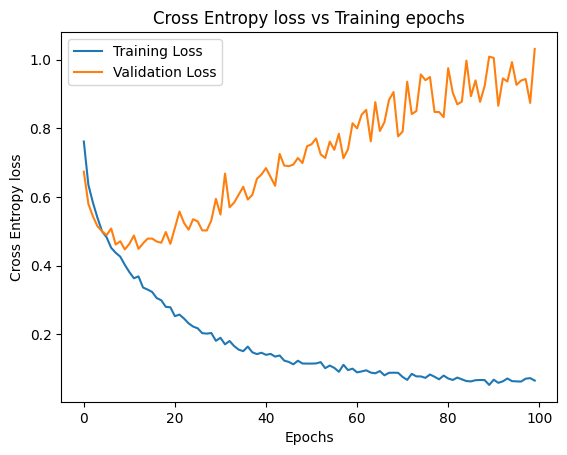

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Cross Entropy loss vs Training epochs")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy loss")
plt.show()

Cambios realizados:

- Aumento de `input_shape=(64, 64, 3)` a `input_shape=(128, 128, 3)`.
- Aumento número de mapas de características en la segunda capa de convolución y max pooling con `filters=64`.
- Añadida capa Dropout con un `rate=0.2` antes de la capa de salida.
- Aumento del número de épocas de `epochs=25` a `epochs=100`.

Resultados obtenidos:

```bash
Epoch 10/100

Epoch 10: val_loss improved from 0.46148 to 0.44721, saving model to my_best_model.epoch10-loss0.45.hdf5
251/251 - 60s - loss: 0.4023 - accuracy: 0.8176 - val_loss: 0.4472 - val_accuracy: 0.8034 - 60s/epoch - 237ms/step
```

Como se observa en la figura anterior, a partir de los 10 epochs aumenta el valor de las pérdidas en el conjunto de validación. Por tanto, aunque se han obtenido epochs con mayor valor de precisión en el conjunto de prueba (aproximadamente un 82%), nos quedamos con el modelo con el que se han obtenido menores pérdidas en el conjunto de validación.

- Medalla de oro🥇: ¡Prueba de precisión del conjunto superior al 90%! ❌

- Medalla de plata🥈: precisión del conjunto de prueba entre 85% y 90% ❌

- Medalla de bronce🥉: precisión del conjunto de prueba entre 80% y 85% ✅


## Parte 3 - Hacer nuevas predicciones

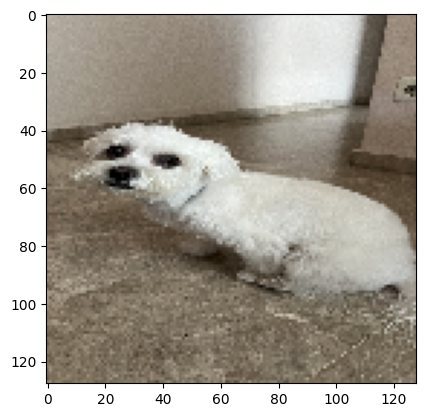

In [14]:
img = image.load_img(
    "dataset/single_prediction/nalita.jpg",
    target_size=(128, 128)
    )
plt.imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [15]:
result = classifier.predict(img)

if result[0][0] == 1:
    prediction = "perro"
else:
    prediction = "gato"

print("El animal de la imagen se trata de un {}".format(prediction))

1/1 [==============================] - 0s 156ms/step
El animal de la imagen se trata de un perro


In [17]:
"""
# Carga del mejor modelo obtenido
classifier = load_model(filepath="my_best_model.epoch10-loss0.45.hdf5")
result = classifier.predict(img)

if result[0][0] == 1:
    prediction = "perro"
else:
    prediction = "gato"

print("El animal de la imagen se trata de un {}".format(prediction))
"""

1/1 [==============================] - 0s 62ms/step
El animal de la imagen se trata de un perro
